In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.shape

(333, 15)

https://www.kaggle.com/c/boston-housing/overview

In [6]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
train.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


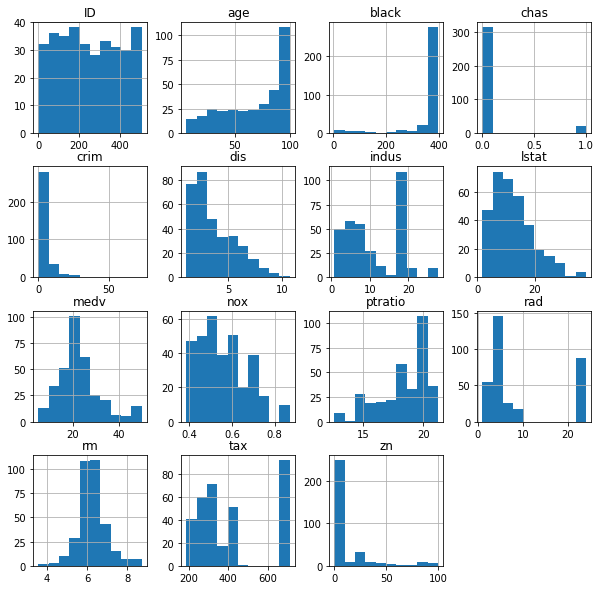

In [9]:
train.hist(figsize=(10,10));

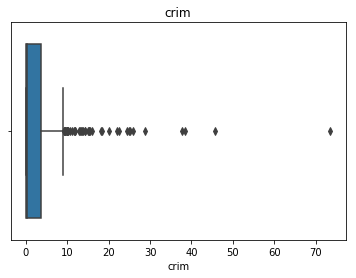

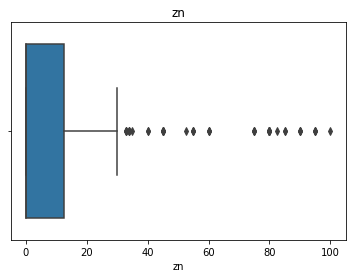

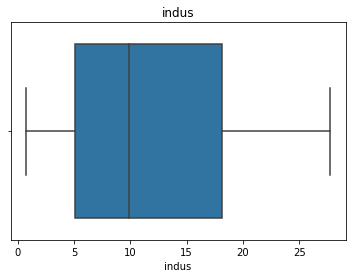

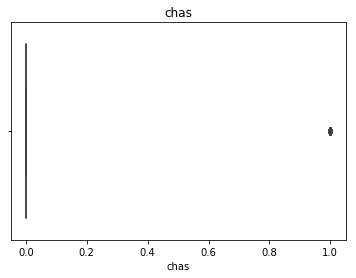

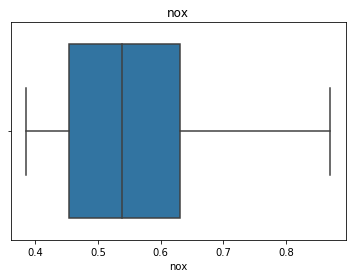

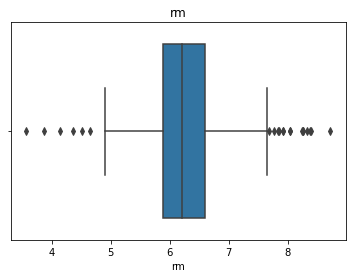

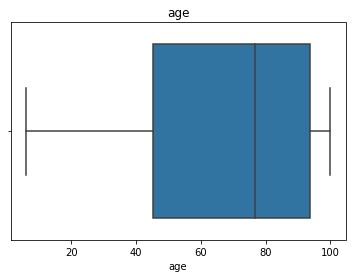

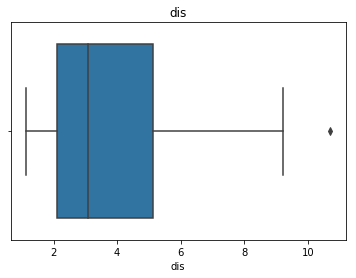

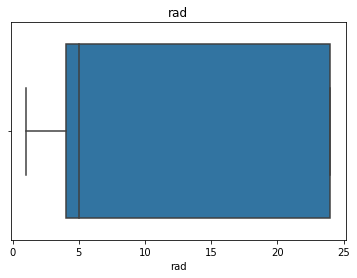

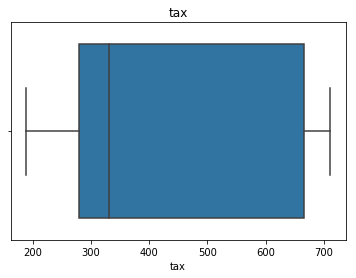

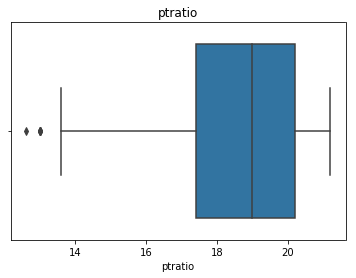

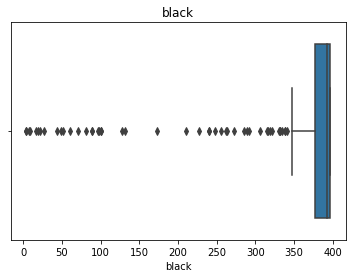

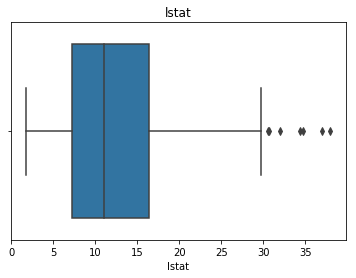

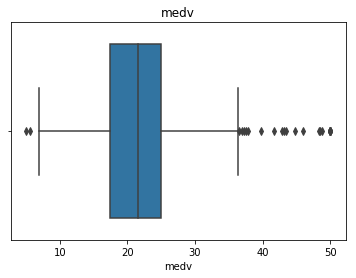

In [10]:
for col in train.columns[1:]:
    plt.figure()
    sns.boxplot(x = train[col], data = train)
    plt.title(col)
    

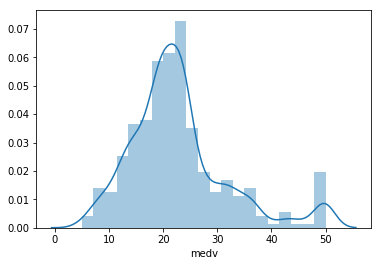

In [11]:
sns.distplot(train["medv"]);

In [12]:
train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

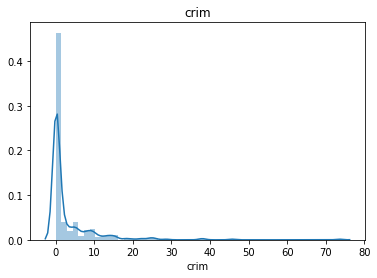

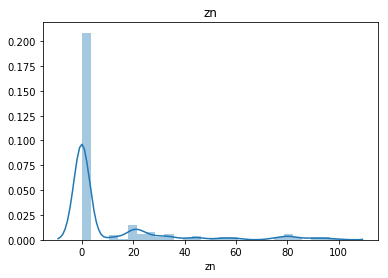

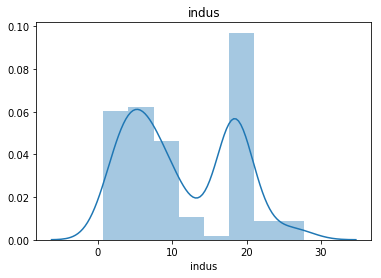

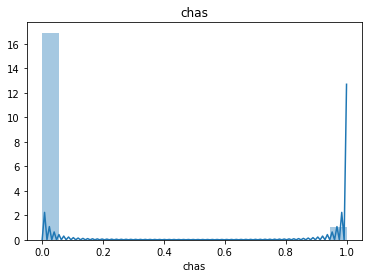

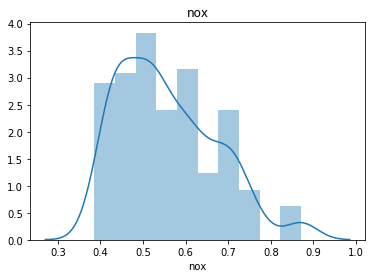

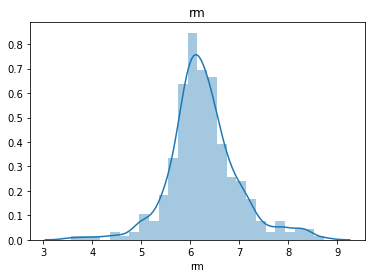

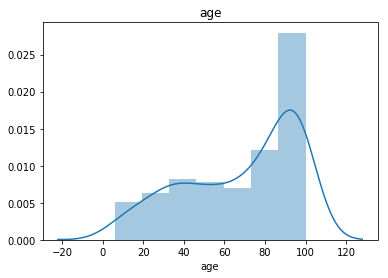

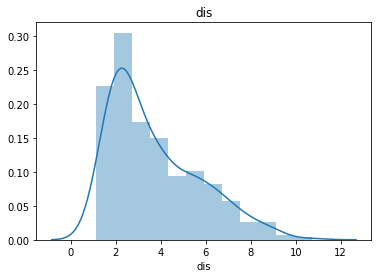

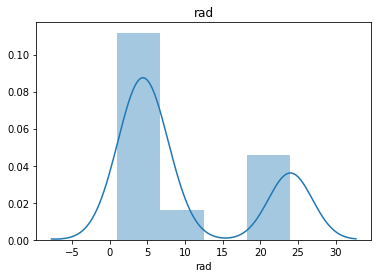

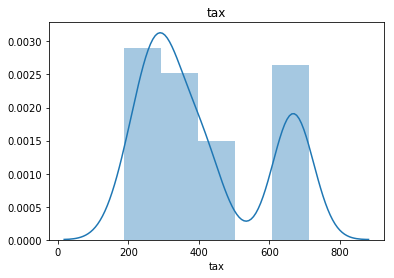

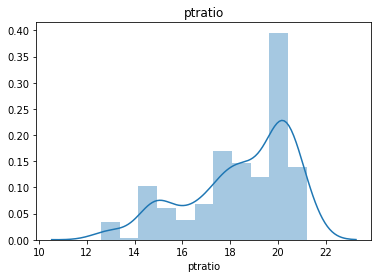

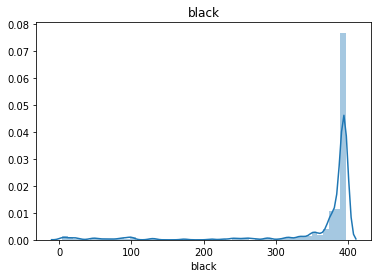

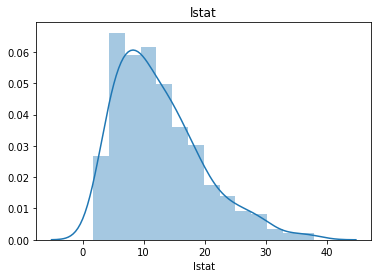

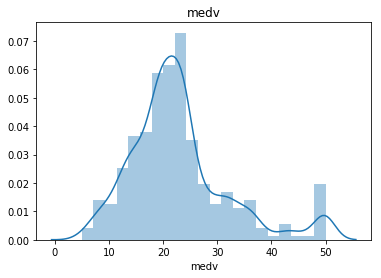

In [14]:
for col in train.columns[1:]:
    plt.figure()
    sns.distplot(train[col])
    plt.title(col)
    

# Modeling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [17]:
train.drop("ID",axis=1, inplace=True)

In [18]:
train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [19]:
X_train,X_val,y_train, y_val = train_test_split(
    train.drop("medv", axis=1), train["medv"], test_size=0.2)

In [20]:
X_train.shape, X_val.shape

((266, 13), (67, 13))

In [21]:
y_train.shape, y_val.shape

((266,), (67,))

In [22]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
178,0.55007,20.0,3.97,0,0.6470,7.206,91.6,1.9301,5,264,13.0,387.89,8.10
42,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
179,0.76162,20.0,3.97,0,0.6470,5.560,62.8,1.9865,5,264,13.0,392.40,10.45
262,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
151,0.62356,0.0,6.20,1,0.5070,6.879,77.7,3.2721,8,307,17.4,390.39,9.93


In [23]:
X_val.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
120,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64
200,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329,16.1,383.61,8.67
138,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61
153,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14
301,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99


# Model building

# Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model = DecisionTreeRegressor()

In [26]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [27]:
y_pred = model.predict(X_val)

In [28]:
y_pred

array([24.3, 22.2, 28.7, 39.8, 23. , 14.1, 23. , 22.1, 24.6, 13.8, 16.2,
       19.3,  5. , 39.8, 17. , 12. , 16.2, 48.3, 14.3,  8.8, 22.2, 11.3,
       20.4, 19.1, 15.2, 11. , 27.1, 20.3, 32.5, 21.7, 20.6, 18.2, 23.8,
       14.1, 19.7, 20.3, 25.1, 16.1, 13.1, 33.1, 13.6, 20.4, 22.2, 33.4,
       14.3, 19.3, 16.6, 30.5, 20.5, 41.7, 19.9, 21.4, 32.4, 15.2, 10.8,
       20.3, 36.2, 18.6, 28.1, 21.4, 39.8, 17.5, 22.6, 32.9, 23.6, 17.8,
       16.2])

In [29]:
y_val.values

array([22.6, 26.4, 30.3, 44.8, 19.5,  9.5, 16.1, 24.6, 23.5, 13.8, 12.8,
       23.7,  7. , 50. , 19.1, 19.1, 12.5, 50. , 14.9,  7.2, 36.2, 12.3,
       19.8, 12.7, 18.4, 11.7, 23.9, 22.6, 24.4, 25. , 20.8, 20.2, 25. ,
       15.4, 20. , 16.2, 16.5, 23.2, 19. , 34.9, 15.6, 18. , 24.5, 36.1,
       16.4, 23.3, 19.5, 31.2, 18.8, 35.2, 20.6, 24.3, 26.6, 16.7,  8.7,
       22. , 33.4, 19.4, 20.6, 23.9, 37.6, 18.4, 10.9, 35.4, 23.9, 50. ,
       17.8])

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
np.sqrt(mean_squared_error(y_val, y_pred))

5.840619472358691

In [32]:
r2_score(y_val, y_pred)

0.6344261788660508

# RandomForest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [35]:
model = RandomForestRegressor(n_estimators=20, max_depth=5, max_features= 0.5 )

In [36]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
y_pred = model.predict(X_val)

In [38]:
y_pred

array([22.04721904, 23.32527121, 34.0803969 , 42.75621892, 20.18533505,
       15.07295003, 20.48228247, 23.72635542, 24.39261785, 16.85788254,
       14.70744125, 18.54385968,  9.72581731, 41.24911436, 18.86254702,
       14.94692353, 14.64334828, 41.06989551, 16.57994991, 12.09850815,
       23.28778371, 13.89143906, 19.17608125, 16.33895621, 15.96642422,
       17.82274076, 25.8412456 , 20.92353425, 25.11847518, 24.58117833,
       20.42184393, 20.62092026, 23.431899  , 13.81977642, 20.38580895,
       20.52560834, 25.03238397, 15.8236446 , 16.80829665, 34.42677872,
       16.38683953, 17.76924951, 22.31404841, 32.91487009, 16.73968724,
       21.47327607, 17.16530031, 29.30812041, 17.69105   , 40.93211436,
       20.39603207, 21.99284582, 25.8412456 , 16.82475104, 10.34505874,
       20.63253536, 34.95340049, 21.33515928, 22.12900772, 22.61021453,
       42.76050464, 17.92122416, 13.41925484, 33.08959232, 28.50268009,
       41.58232972, 15.50386929])

In [39]:
y_val.values

array([22.6, 26.4, 30.3, 44.8, 19.5,  9.5, 16.1, 24.6, 23.5, 13.8, 12.8,
       23.7,  7. , 50. , 19.1, 19.1, 12.5, 50. , 14.9,  7.2, 36.2, 12.3,
       19.8, 12.7, 18.4, 11.7, 23.9, 22.6, 24.4, 25. , 20.8, 20.2, 25. ,
       15.4, 20. , 16.2, 16.5, 23.2, 19. , 34.9, 15.6, 18. , 24.5, 36.1,
       16.4, 23.3, 19.5, 31.2, 18.8, 35.2, 20.6, 24.3, 26.6, 16.7,  8.7,
       22. , 33.4, 19.4, 20.6, 23.9, 37.6, 18.4, 10.9, 35.4, 23.9, 50. ,
       17.8])

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
np.sqrt(mean_squared_error(y_val, y_pred))

3.7480866507930415

In [42]:
r2_score(y_val, y_pred)

0.8494514734238005

In [43]:
test = pd.read_csv("test.csv")

In [44]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [45]:
test.drop("ID", axis=1, inplace=True)

In [46]:
test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [47]:
model.predict(test)

array([36.1442215 , 24.57844265, 18.09891863, 17.2411881 , 18.46102704,
       19.52488889, 20.59168812, 16.94554435, 17.17315752, 19.79861563,
       20.17551767, 21.5170278 , 16.67921224, 16.29395621, 22.1065085 ,
       21.59931986, 22.34098898, 26.38211525, 18.15685694, 23.48465701,
       21.99284582, 23.41140018, 22.34098898, 21.39235651, 21.1474581 ,
       21.79403574, 23.41140018, 23.18727085, 22.65402125, 25.74017417,
       40.10545905, 42.60133929, 34.51811382, 20.31446984, 16.93102595,
       20.40541582, 18.50361645, 17.34687746, 19.29987642, 20.3650739 ,
       16.29422792, 20.17551767, 20.34899386, 16.98892116, 16.22508363,
       15.92885493, 17.37962951, 15.45492817, 20.70098227, 21.72448023,
       16.85018029, 30.9595954 , 49.03142857, 21.09316134, 22.3096973 ,
       22.39423978, 27.81636758, 46.11506944, 37.66428933, 33.96201205,
       31.89406965, 45.67444444, 18.30696574, 17.58327937, 18.19783497,
       19.6877853 , 22.18251074, 23.31728517, 18.26271299, 21.89